In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
x_cols = cols[:-1]
iris_data = pd.read_csv("./data/iris.data.txt", header=None, names=cols)
iris_data.head(50)

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
flower_dic = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

iris_data['b_prediction'] = iris_data['flower'].apply(lambda x: flower_dic[x])

iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,flower,b_prediction
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


# Checking if data is Biased or not

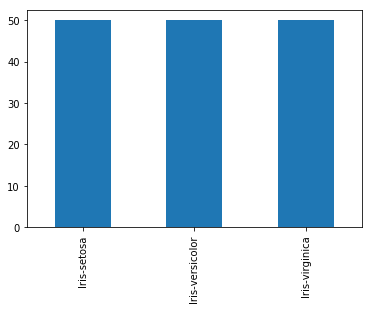

In [5]:
%matplotlib inline
flower_types = iris_data['flower'].value_counts()

flower_types.plot(kind='bar')

# Finding out relevant features

In [6]:
list(iris_data)[0]

'sepal_length'

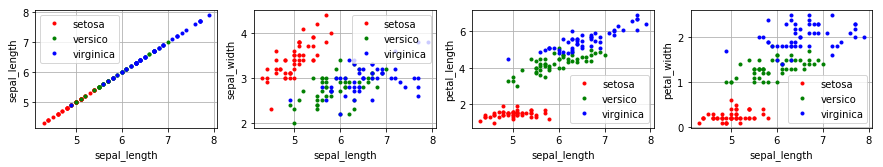

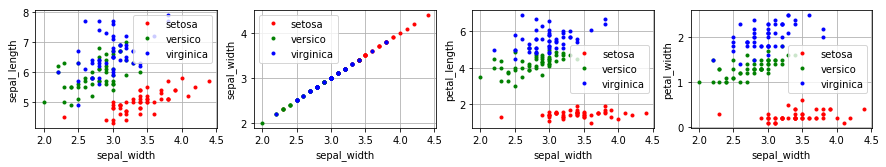

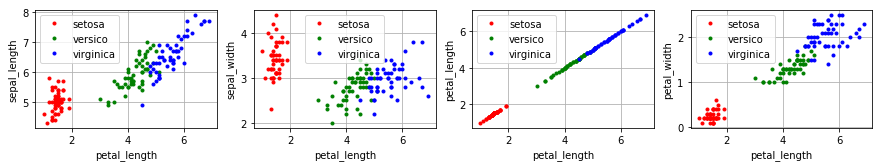

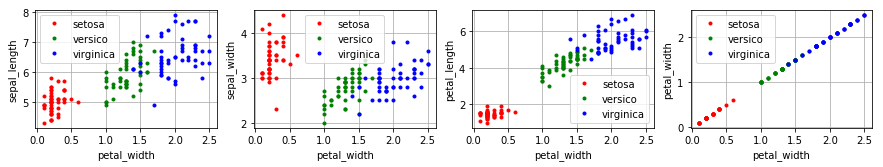

In [8]:
setosa = iris_data[iris_data['b_prediction']==0]
versicolor = iris_data[iris_data['b_prediction']==1]
virginica = iris_data[iris_data['b_prediction']==2]
k =1
for i in range(0,4):
    plt.figure(figsize=(15,10))
    for j in range(0,4):
        
        plt.subplot(4, 4, k)
        k = k+1
        plt.plot(setosa.iloc[:,i], setosa.iloc[:,j], 'r.', label='setosa')
        plt.plot(versicolor.iloc[:,i], versicolor.iloc[:,j], 'g.', label='versico')
        plt.plot(virginica.iloc[:,i], virginica.iloc[:,j], 'b.', label='virginica')
        plt.xlabel(list(iris_data)[i])
        plt.ylabel(list(iris_data)[j])
        plt.grid()
        plt.legend()    
    plt.show() 

In [9]:
columns_to_consider = ['petal_length', 'petal_width']
X = iris_data[columns_to_consider]
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [11]:
Y = iris_data['b_prediction']

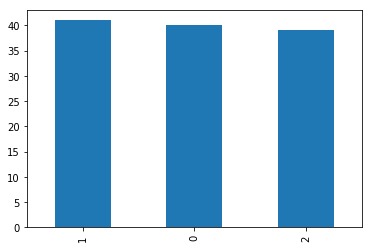

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 299 )

Y_train.value_counts().plot(kind='bar')


In [29]:
decisiontree = DecisionTreeClassifier(criterion= 'entropy', max_depth=2)
obtained_tree = decisiontree.fit(X_train, Y_train)

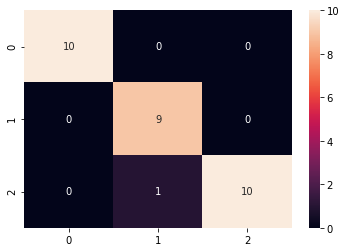

In [30]:
import seaborn as sb
from sklearn import metrics

sb.heatmap(metrics.confusion_matrix(Y_test, decisiontree.predict(X_test)), annot=True, xticklabels=decisiontree.classes_, yticklabels=decisiontree.classes_)

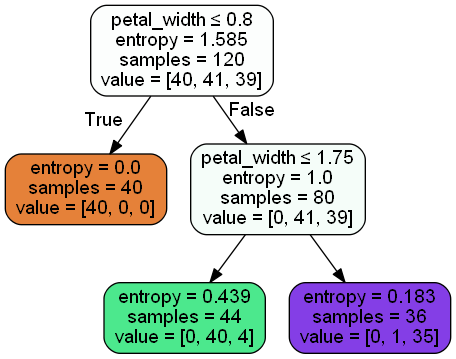

In [31]:
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

DecisionTreeImg = StringIO()


export_graphviz(obtained_tree, out_file = DecisionTreeImg, filled = True, rounded = True, feature_names = ["petal_length", "petal_width"], special_characters = True)

graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())

Image(graph.create_png())

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, decisiontree.predict(X_test))

0.96666666666666667